In [2]:
from collections import defaultdict
import numpy as np
from scipy.stats import rankdata
import matplotlib.pyplot as plt
import matplotlib_fontja
import seaborn as sns


## 30

In [3]:
with open('neko.txt.mecab') as f:
  morphs = []
  morph = []
  for line in f.readlines():
    line = line.rstrip()

    if not line:
      continue

    if line == 'EOS':
      if morph:
        morphs.append(morph)
      morph = []
      continue

    surface, raw_morph = line.split('\t')
    if not surface:
      continue

    morph_list = raw_morph.split(',')
    data = {
      'surface': surface,
      'base': morph_list[6],
      'pos': morph_list[0],
      'pos1': morph_list[1],
    }
    morph.append(data)

  if morph:
    morphs.append(morph)

morphs


[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'

## 31

In [4]:
verb_surface = set()
for line in morphs:
  for morph in line:
    if morph['pos'] == '動詞':
      verb_surface.add(morph['surface'])

verb_surface


{'破ら',
 'いがみ合い',
 '見くびら',
 '降り',
 '泣き',
 '砕けよ',
 '示し',
 '候わ',
 '書か',
 '掘っ',
 '考え出そ',
 '云っ',
 '踏みつけ',
 '利く',
 'もらう',
 '得よ',
 '通そ',
 '着ける',
 '飛ぶ',
 'やってのけ',
 'よん',
 'くぐっ',
 'しかめ',
 '用い',
 'やむを得ん',
 '構え',
 '承ら',
 '這入ら',
 '食み出し',
 '近づい',
 '聞き返す',
 '暮らさ',
 '掬い',
 '学ぶ',
 '載っけ',
 '定め',
 'おこせ',
 'ふかし',
 '起さ',
 '騒い',
 'あてがう',
 '眩む',
 '気づかい',
 '懸る',
 '始め',
 'たまり',
 '持て余し',
 '重んぜ',
 '奪い',
 '下され',
 '収めん',
 '並べる',
 '抗する',
 '触れ',
 '着せる',
 '分かれ',
 '過ぎん',
 '踏ま',
 'よごれる',
 '弾か',
 'つまむ',
 '写っ',
 '信ずる',
 '勝っ',
 'よそい',
 '入り込み',
 'あるき',
 '書き',
 'たてる',
 '服せ',
 '流れ込む',
 '擦っ',
 'からかう',
 '寄りつか',
 '伏せっ',
 '突き飛ばし',
 '恐れ入っ',
 '舐め',
 '曲がり',
 '担い',
 '殺せ',
 '恐',
 'つかみ',
 'てっ',
 '寝つか',
 '和する',
 'かる',
 '問い返す',
 '踏み込む',
 '言い放っ',
 '弾きゃ',
 '招い',
 '間に合わ',
 '弾い',
 'く',
 '拾い',
 'え',
 '行き過ぎよ',
 '出掛けよ',
 '受け取れ',
 'なくなる',
 '浸す',
 '合せる',
 'きつけ',
 '演じ',
 '迷わさ',
 '聞きゃ',
 '擦る',
 '申し聞け',
 '分れ',
 '分ら',
 '担ぎ出す',
 '捉え',
 '苦しん',
 '洒落',
 '思い立ち',
 '語る',
 '断り',
 '去ら',
 '損ね',
 '引き戻し',
 'わり',
 '及ぼす',
 '重んず',
 '付い',
 '仕切っ',
 '見付かる',
 '極め',
 

## 32

In [5]:
verb_base = set()
for line in morphs:
  for morph in line:
    if morph['pos'] == '動詞':
      verb_base.add(morph['base'])

verb_base


{'つけ込む',
 '寄りつく',
 '利く',
 'もらう',
 'とぼける',
 '舞い戻る',
 '着ける',
 'むき出す',
 '張りつめる',
 '飛ぶ',
 'かぶせる',
 '捉える',
 'たでる',
 '溺れる',
 '通り越す',
 '古ぼける',
 '動じる',
 'がかる',
 '切り開く',
 '懲りる',
 '聞き返す',
 '学ぶ',
 '眩む',
 'あてがう',
 '望む',
 '懸る',
 '仰る',
 '勝れる',
 '上がれる',
 '並べる',
 '抗する',
 '着せる',
 'よごれる',
 'つまむ',
 'あたう',
 '信ずる',
 'たてる',
 '流れ込む',
 'からかう',
 '跨ぐ',
 '酔っ払う',
 'いじめる',
 '知れ渡る',
 '和する',
 'かる',
 '飛び込める',
 '問い返す',
 '踏み込む',
 '開け放す',
 '跳ね返す',
 'く',
 '寝込む',
 '間違う',
 '悟れる',
 'なくなる',
 '浸す',
 '合せる',
 '擦る',
 '遮る',
 '演じる',
 '設ける',
 '担ぎ出す',
 '遠のく',
 'ゆする',
 '語る',
 'あこがれる',
 '引き摺り込む',
 '於く',
 '及ぼす',
 '遊ばす',
 '亡ぼす',
 '焦げる',
 '見付かる',
 '囃す',
 '恋う',
 'うなる',
 '名乗る',
 '下る',
 '喰う',
 '感ずる',
 '乗り越える',
 'ぶらさげる',
 '打ちつける',
 '沈む',
 'あがる',
 '乗り込む',
 '曇る',
 '出合う',
 '取り払う',
 '捕れる',
 'じゃれる',
 '潜る',
 '追う',
 '曲げる',
 '苦しめる',
 'おる',
 '申し立てる',
 '帰す',
 '捌ける',
 '湧き出る',
 '争う',
 '突き立てる',
 '這出る',
 '舞い込む',
 'まする',
 '差し支える',
 '亡くなる',
 'ともる',
 '暮す',
 '振り上げる',
 '見違える',
 '響く',
 '済む',
 '生やす',
 'おどす',
 '堪える',
 '遺す',
 '鳴らす',
 '愛す',
 '断わる',
 '鼓する',
 '巻く',
 

## 33

In [6]:
connected_pairs = set()
for line in morphs:
  for i in range(len(line)):
    if line[i]['surface'] == 'の':
      try:
        if line[i-1]['pos'] == line[i+1]['pos'] == '名詞':
          v1 = line[i-1]['surface']
          v2 = line[i+1]['surface']
          connected_pairs.add(f'{v1}の{v2}')
      except:
        continue

connected_pairs


{'一身上の便宜',
 '目垣の外側',
 '週間の間',
 '精一杯のところ',
 '自殺の方法',
 'カンヴァスの上',
 'パスカルの事',
 '県のもの',
 '猿の末孫',
 '群の中',
 '娼家の下婢',
 '協会の新年',
 '館の校長',
 '演説の続き',
 '黒の性質',
 '顔の方',
 '吉利のナイス',
 '時分の事',
 '上の見地',
 '吾輩の横腹',
 '相当の論拠',
 '金米糖のよう',
 '戦争の通信',
 '向のまま',
 '正当の手続き',
 '狂人の作',
 '人の職人',
 '主人のため',
 '人間の古物',
 '最後の奴',
 '子の方',
 'ふたりの人',
 '俺の着物',
 '垣根の下',
 '後れの感',
 '縮緬の腹合せ',
 '殺伐の気',
 '所の三',
 '天地の相違',
 '闇の中',
 '要の口論',
 '鉢の中',
 '神の全智',
 '秋冷の候',
 '町の下宿',
 '池のまわり',
 '主人の蛇蝎',
 '進化の法則',
 '婦人の名',
 '細君のいびき',
 '白の帆',
 '上の必要',
 '上の不便',
 '君子の袖',
 '自分の義務',
 '天下の人',
 '毛布の命',
 '敵の声',
 '前の古物',
 '化物の頭',
 'Hierophilusの講義',
 'ただの人間',
 '乾の方角',
 '松の木の上',
 '口の中',
 '当人の腹',
 '爪の先',
 '天下の珍品',
 '細君のため',
 '炬燵の上',
 '堅気の人',
 '保険の必要',
 '不思議のよう',
 '婦人の礼服',
 '細君の事',
 'ものの上',
 '紺の無地',
 '多くの摩擦',
 '石の並べ方',
 '文章の上',
 '鼻の先',
 '残念の気色',
 '経験のため',
 'ライプニッツの定義',
 '古来の豪傑',
 '彼の皮膚',
 '毛の先',
 '鰹節の一',
 '国事の秘密',
 '籠の中',
 '吾輩の襟',
 '雪の中',
 '机の前',
 '供のよう',
 '胃弱の癖',
 '敵の不意',
 '壁の隙',
 'ニュートンの運動',
 '隆盛の段',
 '蒲鉾の一切',
 '主人の三面',
 '程度の良心',
 '弾の所在地',
 '左の方',
 '障子の影',

## 34

In [8]:
subject_sequences = set()
for line in morphs:
  sequence = []
  for morph in line:
    if morph['pos'] != '名詞':
      if len(sequence) > 1:
        subject_sequences.add(''.join(sequence))
      sequence = []
      continue

    sequence.append(morph['surface'])

  if len(sequence) > 1:
    subject_sequences.add(''.join(sequence))

subject_sequences


{'昔場末',
 '礼儀作法',
 '大小六個',
 '雪江さん',
 '催促状',
 '犯罪者',
 '迷亭先生',
 '四ツ目垣',
 '五円札',
 '横向',
 '——猫',
 '街鉄',
 '何だい紙幣',
 '韓国統監',
 '二尺四方',
 '二三段',
 '鮑貝',
 '返答次第',
 '近頃東京',
 '岩見重太郎',
 '男一人',
 '間板',
 '大抵三口半',
 '狂臭',
 '一点',
 '春夏秋冬一枚看板',
 '次第さ',
 '賤業婦',
 '——何探偵',
 '間違いだらけ',
 'ハハハ教師',
 '抱え車夫',
 '君シャンパン',
 '何迷亭',
 '鳥屋抔',
 '——なあに君',
 '青年男女',
 '六十',
 '恃め',
 '僕あいつ',
 'いつ頭',
 '一人芸者',
 '煙草入',
 '顔半分',
 '苦沙弥先生',
 '春慶塗り',
 'その後跛',
 '得顔',
 'ハハハ日本堤分署',
 '御名論',
 '杢阿弥',
 '千字文',
 '胸一杯',
 '春風馬堤曲',
 'すべて敵',
 '十六',
 '近頃大分',
 '君独仙',
 '社会的現象',
 '詩界',
 '二十日頃',
 '談笑中',
 '三分の二',
 '望み通り僕',
 '武士今',
 '天地開闢以来吾輩',
 '先日鼻',
 '御苦労様',
 '四寸角',
 '彼等人間',
 '通り静か',
 '金善',
 '通り先日僕',
 '外濠線',
 '七日間',
 '告朔',
 '僕一人',
 '逆上受合',
 'チーン',
 '一晩',
 '八本',
 '巡りさん',
 '大分多く',
 'かい巻',
 '存外自覚心',
 '八畳',
 'なに鴛鴦歌',
 'ガラス屋',
 '菓子皿',
 '限り系統的',
 '三十五反八分七',
 '頭——頭',
 'お話しな',
 '海老茶式部',
 '高等学校時代',
 '二十分',
 '毎日毎日御苦労',
 '三人鼎坐',
 '眼脂',
 '鼻子',
 '寒月流',
 '十七八',
 'いく篇',
 '三寸',
 'その後二絃琴',
 '吾輩ども',
 '武右衛門君下',
 '神祇釈教恋無常',
 '小判形',
 '主人以上',
 '春風影裏',
 '——当人',
 '上座どころ',
 '四望人',

## 35

In [7]:
num_vocab = defaultdict(int)
for line in morphs:
  for morph in line:
    if morph['pos'] == '記号':
      continue
    num_vocab[morph['base']] += 1

num_vocab = sorted(num_vocab.items(), key=lambda x: x[1], reverse=True)
num_vocab


[('の', 9194),
 ('て', 6848),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('だ', 5972),
 ('と', 5508),
 ('が', 5337),
 ('た', 4267),
 ('する', 3657),
 ('ない', 3052),
 ('も', 2479),
 ('ある', 2320),
 ('*', 2191),
 ('で', 2084),
 ('から', 2031),
 ('いる', 1777),
 ('ん', 1568),
 ('か', 1529),
 ('云う', 1408),
 ('事', 1207),
 ('です', 1164),
 ('ます', 1146),
 ('なる', 1120),
 ('へ', 1034),
 ('う', 987),
 ('もの', 981),
 ('君', 973),
 ('主人', 932),
 ('ぬ', 719),
 ('よう', 696),
 ('見る', 675),
 ('ね', 657),
 ('この', 649),
 ('御', 636),
 ('ば', 617),
 ('人', 602),
 ('その', 576),
 ('一', 554),
 ('そう', 546),
 ('何', 539),
 ('思う', 502),
 ('よ', 502),
 ('吾輩', 481),
 ('来る', 460),
 ('れる', 450),
 ('じゃ', 450),
 ('これ', 414),
 ('さ', 410),
 ('それ', 381),
 ('聞く', 347),
 ('でも', 346),
 ('時', 345),
 ('行く', 340),
 ('出来る', 324),
 ('三', 319),
 ('出る', 317),
 ('な', 317),
 ('まで', 313),
 ('ところ', 313),
 ('方', 312),
 ('やる', 311),
 ('二', 303),
 ('上', 294),
 ('いい', 294),
 ('寒月', 286),
 ('顔', 282),
 ('先生', 274),
 ('人間', 272),
 ('くらい', 269),
 ('僕', 268),
 ('ごとし', 261)

## 36

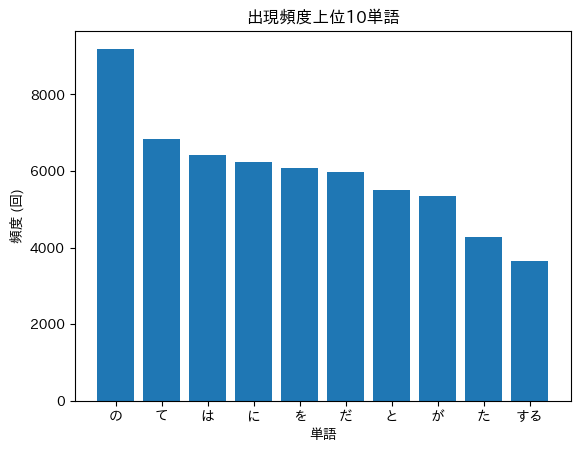

In [8]:
top_10 = num_vocab[:10]
vocab, val = zip(*top_10)
plt.bar(vocab, val)
plt.title('出現頻度上位10単語')
plt.xlabel('単語')
plt.ylabel('頻度 (回)')
plt.show()


## 37

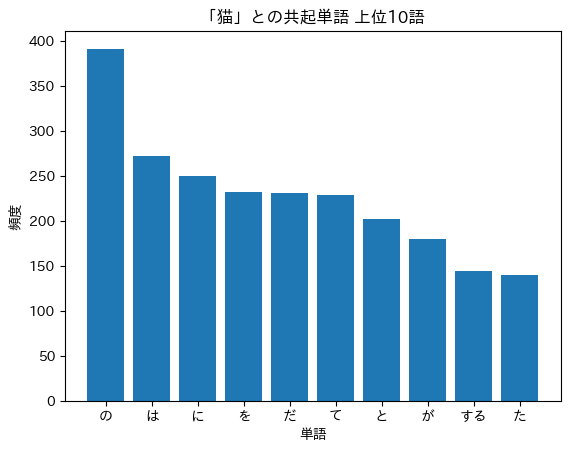

In [9]:
co = defaultdict(int)

for line in morphs:
  flag = False
  for morph in line:
    if morph['base'] == '猫':
      flag = True
      break

  if flag:
    for morph in line:
      if morph['base'] != '猫' and morph['pos'] != '記号':
        co[morph['base']] += 1

co = sorted(co.items(), key=lambda x: x[1], reverse=True)[:10]
co_vocab, co_num = zip(*co)
plt.bar(co_vocab, co_num)
plt.title('「猫」との共起単語 上位10語')
plt.xlabel('単語')
plt.ylabel('頻度')
plt.show()


## 38

(array([1.1196e+04, 1.3000e+01, 5.0000e+00, 2.0000e+00, 1.0000e+00,
        2.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 9.2030e+02, 1.8396e+03, 2.7589e+03, 3.6782e+03,
        4.5975e+03, 5.5168e+03, 6.4361e+03, 7.3554e+03, 8.2747e+03,
        9.1940e+03]),
 <BarContainer object of 10 artists>)

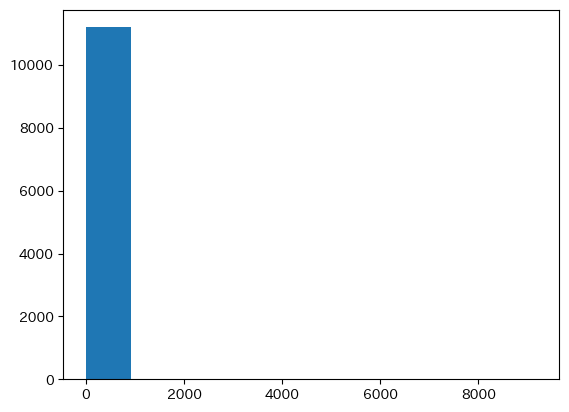

In [10]:
vocab, num = zip(*num_vocab)
plt.hist(num)


## 39

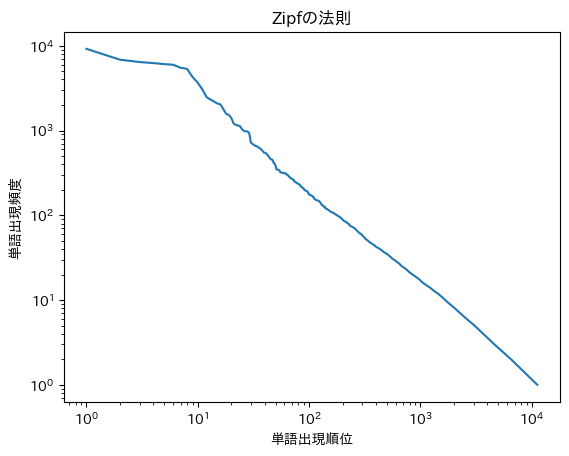

In [23]:
vocab, num = zip(*num_vocab)
rank = rankdata(-np.array(num), 'max')

plt.xscale('log')
plt.yscale('log')
plt.plot(rank, num)
plt.title('Zipfの法則')
plt.xlabel('単語出現順位')
plt.ylabel('単語出現頻度')
plt.show()
